Support Vector Machine (SVM)

Import Libraries

In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

Generate some (random) data

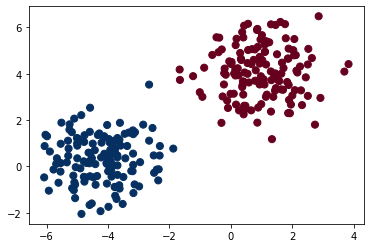

In [2]:
X, Y = datasets.make_blobs(400, 2, centers=2, random_state=3, cluster_std=1.0)
TrainX, TestX, TrainY, TestY = train_test_split(X, Y, test_size=0.3, random_state=0)

plt.scatter(TrainX[:,0], TrainX[:,1], c=TrainY, s=50, cmap='RdBu')

Train SVM

In [0]:
from sklearn import svm

In [5]:
svmmodel = svm.SVC(kernel='linear')
svmmodel.fit(TrainX, TrainY)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [6]:
svmmodel.coef_

array([[-1.02307797, -0.52414831]])

In [7]:
svmmodel.intercept_

array([-0.51600961])

(50,)
(50,)


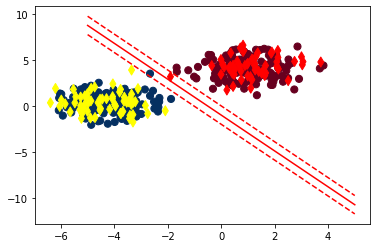

In [11]:
w = svmmodel.coef_[0]
slope = -w[0] / w[1]

xx = np.linspace(-5, 5)
yy = slope * xx - svmmodel.intercept_[0] / w[1] # decision boundary
yy1 = slope * xx - svmmodel.intercept_[0] / w[1] + 1 # margin
yy2 = slope * xx - svmmodel.intercept_[0] / w[1] - 1 # margin

print(xx.shape)
print(yy.shape)

plt.scatter(TrainX[:,0], TrainX[:,1], c=TrainY, s=50, cmap='RdBu')
plt.scatter(TestX[:,0], TestX[:,1], c=TestY, marker='d', s=50, cmap='autumn')
plt.plot(xx, yy, 'r')
plt.plot(xx, yy1, 'r--')
plt.plot(xx, yy2, 'r--')
plt.show()

Performance Evaluation

In [0]:
from sklearn import metrics

Accuracy

In [13]:
tr_pred = svmmodel.predict(TrainX)
tr_acc = metrics.accuracy_score(TrainY, tr_pred)

ts_pred = svmmodel.predict(TestX)
ts_acc = metrics.accuracy_score(TestY, ts_pred)

print("Training Accuracy : ", tr_acc)
print("Test Accuracy : ", ts_acc)

Training Accuracy :  1.0
Test Accuracy :  1.0


Confusion Matrix

In [14]:
tr_cmat = metrics.confusion_matrix(TrainY, tr_pred)
print(tr_cmat)

ts_cmat = metrics.confusion_matrix(TestY, ts_pred)
print(ts_cmat)

[[141   0]
 [  0 139]]
[[59  0]
 [ 0 61]]


ROC Analysis

In [0]:
svmmodel = svm.SVC(kernel='linear', probability=True)
svmmodel.fit(TrainX, TrainY)

tr_score = svmmodel.predict_proba(TrainX)
ts_score = svmmodel.predict_proba(TestX)

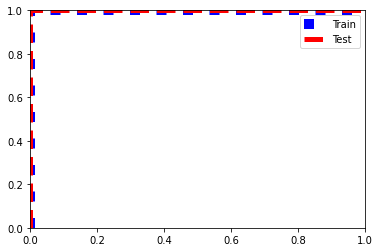

In [16]:
tr_fpr, tr_tpr, tr_th = metrics.roc_curve(TrainY, tr_score[:,1], pos_label=1)
ts_fpr, ts_tpr, ts_th = metrics.roc_curve(TestY, ts_score[:,1], pos_label=1)

plt.plot(tr_fpr, tr_tpr, 'b:', linewidth=10, label='Train')
plt.plot(ts_fpr, ts_tpr, 'r--', linewidth=5, label='Test')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc='best')
plt.show()

In [17]:
tr_auc = metrics.roc_auc_score(TrainY, tr_score[:,1])
print('Training AUC : ', tr_auc)

ts_auc = metrics.roc_auc_score(TestY, ts_score[:,1])
print('Test AUC : ', ts_auc)

Training AUC :  1.0
Test AUC :  1.0
